In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train= pd.read_csv('train.csv')



In [3]:
train.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0


In [4]:
train.count()

Id                21726
Country_Region    21726
Province_State     9230
Date              21726
ConfirmedCases    21726
Fatalities        21726
dtype: int64

In [5]:
train.isna().sum()

Id                    0
Country_Region        0
Province_State    12496
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [6]:
import datetime as datetime
train['Dates'] = pd.to_datetime(train.Date)
train['Year'] = train.Dates.dt.year
train['Month'] = train.Dates.dt.month
train['Week'] = train.Dates.dt.week
train['Name of month'] = train.Dates.dt.month_name()
train['Week_day_name'] = train.Dates.dt.weekday_name
train['Day_of_year'] = train.Dates.dt.dayofyear

In [7]:
from datetime import date
d0 = date(2020,1,22)
d1 = date(2020,4,1)
delta = d1-d0
print(delta)

70 days, 0:00:00


In [8]:
print('The date of the entire data is from', train.Dates.min(), 'to', train.Dates.max(),
      ',a total number of', delta)
print('The total amount of countries in the data is', len(train.Country_Region.unique()))
print('The total sum of confirmed cases is',train.ConfirmedCases.sum())
print('The total sum of Fatalities is',train.Fatalities.sum())

The date of the entire data is from 2020-01-22 00:00:00 to 2020-04-01 00:00:00 ,a total number of 70 days, 0:00:00
The total amount of countries in the data is 180
The total sum of confirmed cases is 11531921.0
The total sum of Fatalities is 480664.0


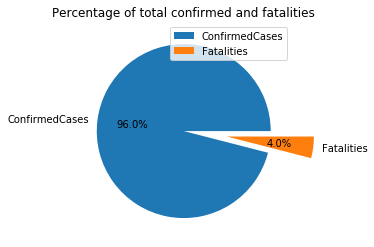

In [9]:
#Pie chart showing the percentage of total confirmed cases and fatality cases
train[['ConfirmedCases','Fatalities']].sum().plot(kind = 'pie', autopct = '%.1f%%', legend = 'best', 
                                                 explode = [0, 0.5], label = '')
plt.title('Percentage of total confirmed and fatalities')
plt.legend()
plt.show()

In [10]:
train.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,Dates,Year,Month,Week,Name of month,Week_day_name,Day_of_year
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0,2020-01-22,2020,1,4,January,Wednesday,22
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0,2020-01-23,2020,1,4,January,Thursday,23
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0,2020-01-24,2020,1,4,January,Friday,24
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0,2020-01-25,2020,1,4,January,Saturday,25
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0,2020-01-26,2020,1,4,January,Sunday,26


In [11]:
train.shape

(21726, 13)

In [12]:
#Countries with province/state present in the data
train.loc[train['Province_State'].isna()== False]['Country_Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'US', 'United Kingdom'], dtype=object)

In [13]:
#Countries with the highest number of confirmed cases(5)
train.groupby('Country_Region')['ConfirmedCases'].sum().nlargest(5)

Country_Region
China      4269156.0
Italy      1321663.0
US         1295478.0
Spain       846815.0
Germany     666630.0
Name: ConfirmedCases, dtype: float64

In [14]:
#Countries with the highest number of fatalities(5)
train.groupby('Country_Region')['Fatalities'].sum().nlargest(5)

Country_Region
China     149110.0
Italy     129684.0
Spain      63966.0
Iran       37407.0
France     25392.0
Name: Fatalities, dtype: float64

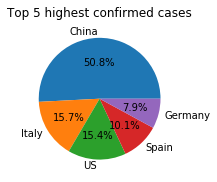

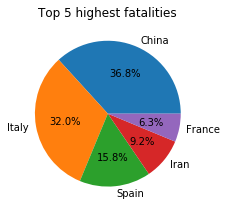

In [15]:
#Piechart showing countries with the highest number of confirmed cases and fatalities(5)
plt.subplot(1,2,1)
train.groupby('Country_Region')['ConfirmedCases'].sum().nlargest(5).plot(kind = 'pie',
                                                                         label ='',autopct ='%0.1f%%')
plt.title('Top 5 highest confirmed cases')
plt.show()
plt.subplot(1,2,2)
train.groupby('Country_Region')['Fatalities'].sum().nlargest(5).plot(kind ='pie',label = '',autopct ='%0.1f%%')
plt.title('Top 5 highest fatalities')
plt.tight_layout()
plt.show()

In [16]:
#The month with the highest confirmed cases for five top contries
train.groupby(['Country_Region', 'Name of month'])['ConfirmedCases'].sum().nlargest(5)

Country_Region  Name of month
China           March            2515426.0
                February         1633361.0
Italy           March            1207121.0
US              March            1082264.0
Spain           March             742546.0
Name: ConfirmedCases, dtype: float64

In [17]:
#The month with the highest fatalities for 5 top countries 
train.groupby(['Country_Region', 'Name of month'])['Fatalities'].sum().nlargest(5)

Country_Region  Name of month
Italy           March            116427.0
China           March             98488.0
Spain           March             54579.0
China           February          46417.0
Iran            March             34200.0
Name: Fatalities, dtype: float64

In [18]:
#Countries and week with the highest confirmed cases
train.groupby(['Country_Region', 'Week'])['ConfirmedCases'].sum().nlargest(10)

Country_Region  Week
US              13      610345.0
China           13      572550.0
                12      568339.0
                11      566525.0
Italy           13      564737.0
China           10      563603.0
US              14      562887.0
China           9       549977.0
                8       525914.0
Spain           13      401386.0
Name: ConfirmedCases, dtype: float64

In [19]:
#Countries and week with the highest fatalities
train.groupby(['Country_Region', 'Week'])['Fatalities'].sum().nlargest(10)

Country_Region  Week
Italy           13      58551.0
                14      37174.0
Spain           13      31054.0
                14      25567.0
Italy           12      25377.0
China           13      23030.0
                12      22723.0
                11      22171.0
                10      21075.0
                9       19222.0
Name: Fatalities, dtype: float64

In [35]:
#Fetching and analysing Nigeria data
Nigeria = train.loc[train.Country_Region == 'Nigeria']
Nigeria.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,Dates,Year,Month,Week,Name of month,Week_day_name,Day_of_year
13277,20010,Nigeria,NaN,2020-01-22,0.0,0.0,2020-01-22,2020,1,4,January,Wednesday,22
13278,20011,Nigeria,NaN,2020-01-23,0.0,0.0,2020-01-23,2020,1,4,January,Thursday,23
13279,20012,Nigeria,NaN,2020-01-24,0.0,0.0,2020-01-24,2020,1,4,January,Friday,24
13280,20013,Nigeria,NaN,2020-01-25,0.0,0.0,2020-01-25,2020,1,4,January,Saturday,25
13281,20014,Nigeria,NaN,2020-01-26,0.0,0.0,2020-01-26,2020,1,4,January,Sunday,26


In [36]:
Nigeria.tail()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,Dates,Year,Month,Week,Name of month,Week_day_name,Day_of_year
13343,20076,Nigeria,NaN,2020-03-28,89.0,1.0,2020-03-28,2020,3,13,March,Saturday,88
13344,20077,Nigeria,NaN,2020-03-29,111.0,1.0,2020-03-29,2020,3,13,March,Sunday,89
13345,20078,Nigeria,NaN,2020-03-30,131.0,2.0,2020-03-30,2020,3,14,March,Monday,90
13346,20079,Nigeria,NaN,2020-03-31,135.0,2.0,2020-03-31,2020,3,14,March,Tuesday,91
13347,20080,Nigeria,NaN,2020-04-01,174.0,2.0,2020-04-01,2020,4,14,April,Wednesday,92


In [37]:
d2 = date(2020,1,22)
d3 = date(2020,4,1)
delta1 = d3-d2
print(delta1)

70 days, 0:00:00


In [38]:
print('The date of  Nigeria data is from', Nigeria.Dates.min(), 'to', Nigeria.Dates.max(),
      ',a total number of', delta1)
print('The total sum of confirmed cases in Nigeria is',Nigeria.ConfirmedCases.sum())
print('The total sum of Fatalities in Nigeria is',Nigeria.Fatalities.sum())

The date of  Nigeria data is from 2020-01-22 00:00:00 to 2020-04-01 00:00:00 ,a total number of 70 days, 0:00:00
The total sum of confirmed cases in Nigeria is 1019.0
The total sum of Fatalities in Nigeria is 13.0


In [39]:
#Highest confirmed cases by month in Nigeria
Nigeria.groupby('Name of month')['ConfirmedCases'].sum()


Name of month
April       174.0
February      2.0
January       0.0
March       843.0
Name: ConfirmedCases, dtype: float64

In [40]:
#Highest fatalities by month in Nigeria
Nigeria.groupby('Name of month')['Fatalities'].sum()

Name of month
April        2.0
February     0.0
January      0.0
March       11.0
Name: Fatalities, dtype: float64

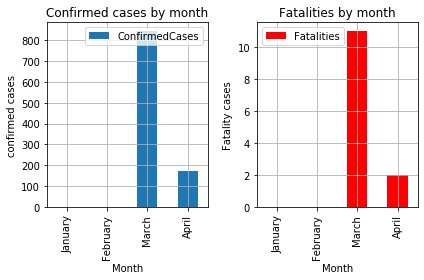

In [41]:
#Barchart showing the number of confirmed cases and fatalities per month 
plt.subplot(1,2,1)
Nigeria.groupby('Month')['ConfirmedCases'].sum().plot(kind = 'bar', grid= True)
plt.title('Confirmed cases by month')
plt.xlabel('Month')
plt.ylabel('confirmed cases')
plt.xticks(np.arange(4), ('January','February','March','April'))
plt.legend()
plt.subplot(1,2,2)
Nigeria.groupby('Month')['Fatalities'].sum().plot(kind = 'bar', grid= True, color='red')
plt.title('Fatalities by month')
plt.xlabel('Month')
plt.ylabel('Fatality cases')
plt.xticks(np.arange(4), ('January','February','March','April'))
plt.legend()
plt.tight_layout()
plt.show()



In [42]:
#Highest confirmed cases by week in Nigeria(10)
Nigeria.groupby('Week')['ConfirmedCases'].sum().nlargest(10)

Week
13    470.0
14    440.0
12     85.0
11     14.0
10      7.0
9       3.0
4       0.0
5       0.0
6       0.0
7       0.0
Name: ConfirmedCases, dtype: float64

In [43]:
#Highest fatalities by week in Nigeria(10)
Nigeria.groupby('Week')['Fatalities'].sum().nlargest(10)

Week
13    7.0
14    6.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
Name: Fatalities, dtype: float64

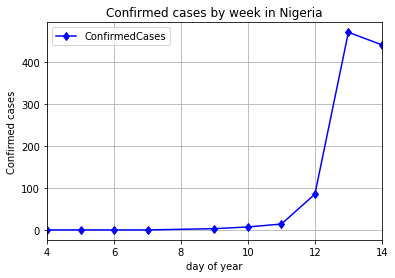

In [44]:
#Chart showing the number of confirmed cases per week for the top 10 weeks
Nigeria.groupby('Week')['ConfirmedCases'].sum().nlargest(10).sort_index().plot(marker = 'd',
                                                                                  color = 'blue',
                                                                                  grid = True)
plt.title('Confirmed cases by week in Nigeria')
plt.xlabel('day of year')
plt.ylabel('Confirmed cases')
plt.legend()
plt.show()

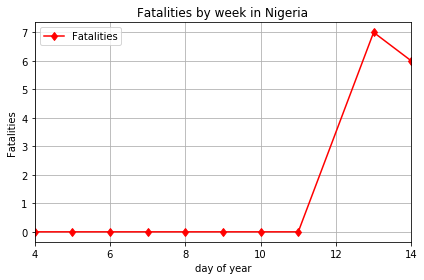

In [45]:
#Chart showing the number of fatalities per week for the top 10 weeks
Nigeria.groupby('Week')['Fatalities'].sum().nlargest(10).sort_index().plot(color ='r',marker ='d',
                                                                          grid = True)
plt.title('Fatalities by week in Nigeria')
plt.xlabel('day of year')
plt.ylabel('Fatalities')
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
#Highest confirmed cases by day of year in Nigeria(10)
Nigeria.groupby('Day_of_year')['ConfirmedCases'].sum().nlargest(10)

Day_of_year
92    174.0
91    135.0
90    131.0
89    111.0
88     89.0
87     70.0
86     65.0
85     51.0
84     44.0
83     40.0
Name: ConfirmedCases, dtype: float64

In [47]:
#Highest fatalities by day of year in Nigeria(10)
Nigeria.groupby('Day_of_year')['Fatalities'].sum().nlargest(10)

Day_of_year
90    2.0
91    2.0
92    2.0
83    1.0
84    1.0
85    1.0
86    1.0
87    1.0
88    1.0
89    1.0
Name: Fatalities, dtype: float64

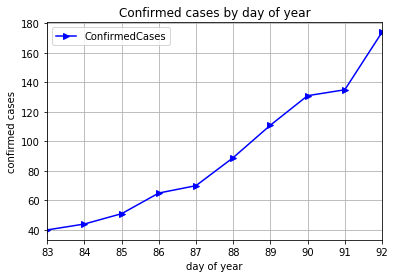

In [48]:
#Chart showing the highest confirmed cases by day of year in Nigeria(10)
Nigeria.groupby('Day_of_year')['ConfirmedCases'].sum().nlargest(10).sort_index().plot(color ='b',marker = '>',
                                                                        grid = True)
plt.title('Confirmed cases by day of year')
plt.xlabel('day of year')
plt.ylabel('confirmed cases')
plt.legend()
plt.show()


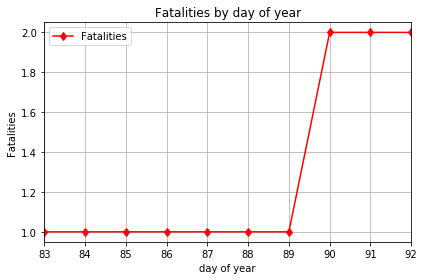

In [49]:
#Chart showing the highest fatalities by day of year in Nigeria(10)
Nigeria.groupby('Day_of_year')['Fatalities'].sum().nlargest(10).sort_values().plot(marker = 'd',
                                                                                  color = 'red',
                                                                                  grid = True)
plt.title('Fatalities by day of year')
plt.xlabel('day of year')
plt.ylabel('Fatalities')
plt.legend()
plt.tight_layout()
plt.show()